In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

# Preview the first 3 rows
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
# Check the summary statistics
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Check the variables data type
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Multivariate Exploration

In the previous workspace, we looked at various bivariate relationships. We saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off we'll, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

In [ ]:
# Create a function that will convert cut, color, and clarity into ordered categorical types
def ordered_var(df, var):
    return df[var].value_counts().index

In [ ]:
# Preview ordered categories for the cut variable
cut_order = ordered_var(diamonds, 'cut')
print(cut_order)

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True, dtype='category')


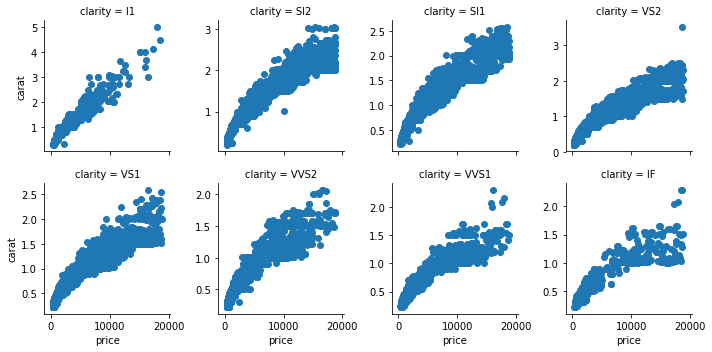

In [ ]:
# plot of the relationship between price, carat, and clarity
g = sb.FacetGrid(data = diamonds, col = 'clarity', size = 2.5, col_wrap = 4, sharey=False)
g.map(plt.scatter, 'price', 'carat');

Price by Carat and Clarity Comment 1: 
>With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

Price by Carat and Clarity Comment 2: 
>You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


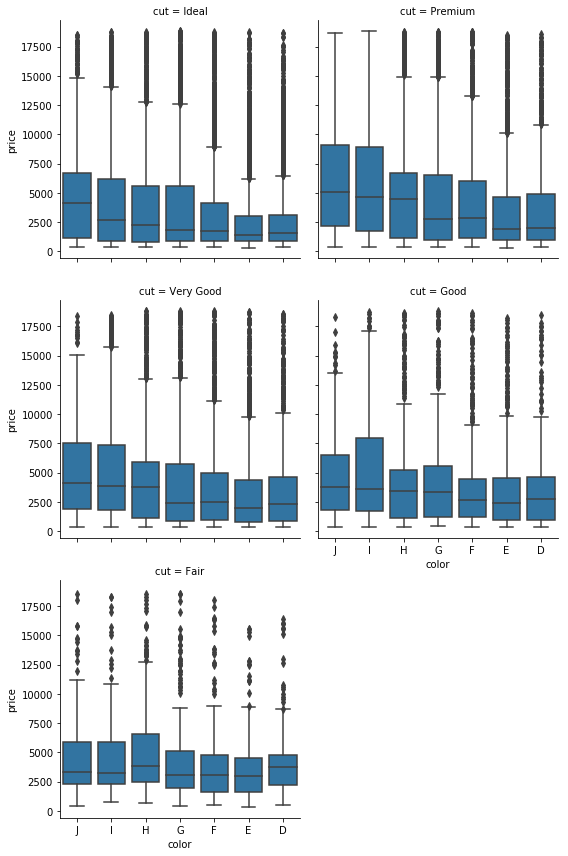

In [ ]:
# plot of the relationship between price, carat, and color
g = sb.FacetGrid(data = diamonds, col = 'cut', size = 4, col_order = cut_order, col_wrap=2)
g.map(sb.boxplot, 'color', 'price');

In [ ]:
# g = sb.FacetGrid(data = diamonds, col = 'cut', size = 4)
# g.map(sb.boxplot, 'color', 'price')

Price by Cut and Color Comment 1: 
>There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

Price by Cut and Color Comment 2: 
>Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>